# Image Classification
Python code for classifying shoe, sandal, and boot images


---


Nadhilah Mustikarini (1494037162100-1057)

@20221208

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Shoe-Sandal-Boot.zip to Shoe-Sandal-Boot.zip


In [2]:
# extract the dataset
import zipfile, os
local_zip = '/content/Shoe-Sandal-Boot.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
os.listdir('/content/Shoe-Sandal-Boot')

['Sandal', 'Boot', 'Shoe']

In [4]:
# split folder into train and validation sets

!pip install split-folders

import splitfolders
splitfolders.ratio('/content/Shoe-Sandal-Boot', output="/content/Shoe-Sandal-Boot/dataset-split", seed=1337, ratio=(0.8, 0.2))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 15000 files [00:02, 6595.40 files/s]


In [47]:
# check the number of files in each directory

print('Train Set (80%)',
      '\nTotal shoe images:', len(os.listdir('/content/Shoe-Sandal-Boot/dataset-split/train/Shoe')),
      '\nTotal sandal images:', len(os.listdir('/content/Shoe-Sandal-Boot/dataset-split/train/Sandal')),
      '\nTotal boot images:', len(os.listdir('/content/Shoe-Sandal-Boot/dataset-split/train/Boot')))

print('\nValidation Set (20%)',
      '\nTotal shoe images:', len(os.listdir('/content/Shoe-Sandal-Boot/dataset-split/val/Shoe')),
      '\nTotal sandal images:', len(os.listdir('/content/Shoe-Sandal-Boot/dataset-split/val/Sandal')),
      '\nTotal boot images:', len(os.listdir('/content/Shoe-Sandal-Boot/dataset-split/val/Boot')))

Train Set (80%) 
Total shoe images: 4000 
Total sandal images: 4000 
Total boot images: 4000

Validation Set (20%) 
Total shoe images: 1000 
Total sandal images: 1000 
Total boot images: 1000


In [48]:
# define directory names for train and validation sets
base_dir = '/content/Shoe-Sandal-Boot/dataset-split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

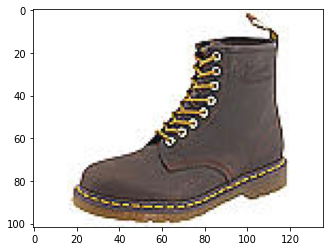

In [49]:
# display some sample images
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/content/Shoe-Sandal-Boot/Boot/boot (10).jpg')
imgplot = plt.imshow(img)

In [50]:
# image augmentation process on each sample in the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale= 1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255)

In [51]:
# image generator

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=4,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=4,
        class_mode='categorical')

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [52]:
# build a model

import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
#    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#    tf.keras.layers.MaxPooling2D(2,2),
#    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
#    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
#    tf.keras.layers.MaxPooling2D(2,2),
#    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
#    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [53]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 36, 36, 128)      

In [54]:
# compile the model 
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
# train the model

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAccuracy has reached >90%!")
      self.model.stop_training = True

callbacks = myCallback()
history = model.fit(
      train_generator,
      steps_per_epoch=30,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2)

Epoch 1/50
30/30 - 38s - loss: 1.9373 - accuracy: 0.3083 - val_loss: 1.0984 - val_accuracy: 0.4500 - 38s/epoch - 1s/step
Epoch 2/50
30/30 - 34s - loss: 1.1041 - accuracy: 0.3583 - val_loss: 1.0953 - val_accuracy: 0.4000 - 34s/epoch - 1s/step
Epoch 3/50
30/30 - 35s - loss: 1.0988 - accuracy: 0.3000 - val_loss: 1.0982 - val_accuracy: 0.3250 - 35s/epoch - 1s/step
Epoch 4/50
30/30 - 35s - loss: 1.0990 - accuracy: 0.3167 - val_loss: 1.0981 - val_accuracy: 0.4750 - 35s/epoch - 1s/step
Epoch 5/50
30/30 - 34s - loss: 1.0986 - accuracy: 0.3667 - val_loss: 1.1005 - val_accuracy: 0.2250 - 34s/epoch - 1s/step
Epoch 6/50
30/30 - 35s - loss: 1.0988 - accuracy: 0.3333 - val_loss: 1.0984 - val_accuracy: 0.3500 - 35s/epoch - 1s/step
Epoch 7/50
30/30 - 34s - loss: 1.0988 - accuracy: 0.3167 - val_loss: 1.0979 - val_accuracy: 0.3750 - 34s/epoch - 1s/step
Epoch 8/50
30/30 - 35s - loss: 1.0979 - accuracy: 0.4000 - val_loss: 1.1152 - val_accuracy: 0.3500 - 35s/epoch - 1s/step
Epoch 9/50
30/30 - 33s - loss: 1

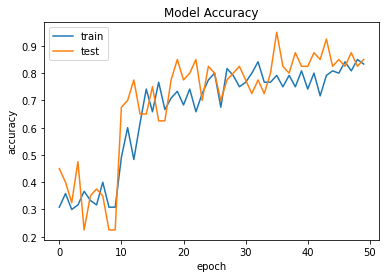

In [56]:
# plot the accuracy of the model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

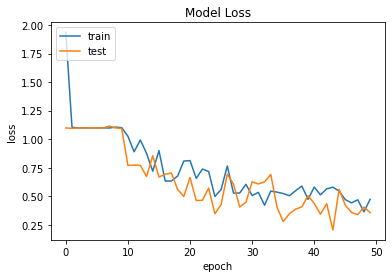

In [57]:
# plot the loss of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
# save the model in SavedModel format
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

In [59]:
# convert SavedModel to shoes.tflite

import pathlib
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('shoes.tflite')
tflite_model_file.write_bytes(tflite_model)

78429720